# `breaks` Parameter of the `geom_histogram()`

In [1]:
import pandas as pd

from lets_plot import *


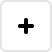
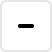
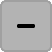
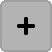
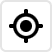
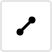
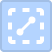
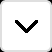
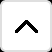
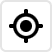
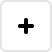
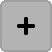
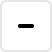
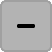
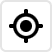
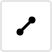
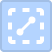
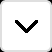
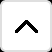
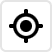

In [2]:
LetsPlot.setup_html()

## Demonstration

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/refs/heads/master/data/mpg.csv")
print(df.shape)
df.head()

(234, 12)


,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### Default Plot

In [4]:
gggrid([
    ggplot(df) + geom_histogram(aes(x="hwy"), color="black", fill="white") + ggtitle("Default binwidth (undefined)"),
    ggplot(df) + geom_histogram(aes(x="hwy"), binwidth=5, color="black", fill="white") + ggtitle("binwidth=5"),
])

### Defined `breaks`

In [5]:
ggplot(df) + geom_histogram(aes(x="hwy"), breaks=[0, 23, 32, 36, 37], color="black", fill="white")

### `binwidth` vs. `breaks`

When both parameters are specified — `binwidth` and `breaks` — `breaks` prevails at the statistical level, overwriting `binwidth`, but the geometry is drawn using the user-specified `binwidth`.

This seems strange, but the combination of parameters is conflicting, so there is no 100% correct interpretation.

In [6]:
ggplot(df) + geom_histogram(aes(x="hwy"), breaks=[0, 23, 32, 36, 37], binwidth=5, color="black", fill="white")

### Some Values are Beyound the `breaks`

In [7]:
ggplot(df) + geom_histogram(aes(x="hwy"), breaks=[20, 22, 28, 30], color="black", fill="white")

### Limits of `breaks` are Wider Than Domain

In [8]:
ggplot(df) + geom_histogram(aes(x="hwy"), breaks=[0, 10, 12, 20, 34, 42, 44, 54], color="black", fill="white")

### One Bin

In [9]:
ggplot(df) + geom_histogram(aes(x="hwy"), breaks=[0, 50], color="black", fill="white")

## Identity Stat

In [10]:
breaks = [100, 140, 160]
identity_data = {
    'x': [120, 150],
    'y': [2, 2],
}

In [11]:
gggrid([
    ggplot(identity_data, aes('x', 'y')) + \
        geom_histogram(stat='identity', breaks=breaks, color='white') + \
        ggtitle("Defined breaks", f"breaks={breaks}"),
    ggplot(identity_data, aes('x', 'y')) + \
        geom_histogram(stat='identity', color='white') + \
        ggtitle("Undefined breaks"),
], ncol=2)

## Non-histogram Geom

In [12]:
ggplot(df) + \
    geom_histogram(aes(x="hwy"), breaks=[0, 23, 32, 36, 37], color="black", fill="white") + \
    geom_label(aes(x="hwy", label="..count.."), stat='bin', breaks=[0, 23, 32, 36, 37])

## Tests

In [13]:
class Test:

    def __init__(self, *, data, breaks, title, skip=False):
        self.data = data
        self.breaks = breaks
        self.title = title
        self.skip = skip

    def to_plot(self):
        return ggplot(self.data, aes(x='x')) + \
            geom_histogram(breaks=self.breaks, color="black", fill="white") + \
            ggtitle(self.title, "breaks={0}".format(self.breaks)) + \
            theme(plot_title=element_text(face='bold'))

tests = [
    Test(
        data={'x': []},
        breaks=[0, 1],
        title="Empty list of values"
    ),
    Test(
        data={'x': [1, 1, 2]},
        breaks=[],
        title="Empty list of breaks"
    ),
    Test(
        data={'x': [1, 1, 2]},
        breaks=None,
        title="breaks=None",
    ),
    Test(
        data={'x': [1]},
        breaks=[0, 2],
        title="One value"
    ),
    Test(
        data={'x': [1, 1, 2]},
        breaks=[0],
        title="One break",
        skip=True
    ),
    Test(
        data={'x': [1, 1, 2]},
        breaks=[0, 3],
        title="Two breaks"
    ),
    Test(
        data={'x': [1, 1, 3]},
        breaks=[0, 2, 4],
        title="Equal breaks"
    ),
    Test(
        data={'x': [1, 1, 2]},
        breaks=[3, 0],
        title="Unordered breaks",
        skip=True
    ),
    Test(
        data={'x': [1, 1, 2]},
        breaks=[0, 0, 3],
        title="Repeated breaks",
        skip=True
    ),
    Test(
        data={'x': [1, None, 1]},
        breaks=[0, 2],
        title="NA in values"
    ),
    Test(
        data={'x': [1, 1, 2]},
        breaks=[0, None, 3],
        title="NA in breaks",
        skip=True
    ),
    Test(
        data={'x': [1, 3]},
        breaks=[0, 2],
        title="Some values beyound the breaks"
    ),
    Test(
        data={'x': [2, 3]},
        breaks=[0, 1],
        title="All values beyound the breaks"
    ),
]

gggrid([test.to_plot() for test in tests if not test.skip], ncol=4)

### Regressions

In [14]:
# Check domain

def get_plot_reg1(width, orientation='x'):
    data = {
        'v': [101, 103, 105]
    }
    mapping = aes(x='v') if orientation == 'x' else aes(y='v')
    return ggplot(data) + \
        geom_histogram(mapping, breaks=[100, 104, 106], color="white", width=width, orientation=orientation, alpha=.75) + \
        ggtitle(f"width={width}\norientation='{orientation}'")

gggrid([
    get_plot_reg1(1),
    get_plot_reg1(.5),
    get_plot_reg1(2),
    get_plot_reg1(1, orientation='y'),
    get_plot_reg1(.5, orientation='y'),
    get_plot_reg1(2, orientation='y'),
], ncol=3)

In [15]:
# Check domain identity

def get_plot_reg2(width, orientation='x'):
    data = {
        'x': [103, 105],
        'y': [2, 1],
    }
    mapping = aes('x', 'y') if orientation == 'x' else aes('y', 'x')
    axis_breaks = [97, 98, 99, 100, 101, 101.5, 102, 102.5, 103, 103.5, 104, 104.5, 105, 105.5, 106, 106.5, 107]
    p = ggplot(data) + \
        geom_histogram(mapping, stat='identity', breaks=[100, 104, 106], color="white", width=width, orientation=orientation, alpha=.75) + \
        geom_point(mapping, color='red') + \
        ggtitle(f"width={width}\norientation='{orientation}'")
    if orientation == 'x':
        p += scale_x_continuous(breaks=axis_breaks)
    else:
        p += scale_y_continuous(breaks=axis_breaks)
    return p

gggrid([
    get_plot_reg2(1),
    get_plot_reg2(.5),
    get_plot_reg2(2),
    get_plot_reg2(1, orientation='y'),
    get_plot_reg2(.5, orientation='y'),
    get_plot_reg2(2, orientation='y'),
], ncol=3)

In [16]:
# Check one bin case

def get_plot_reg3(binwidth=None, center=None, boundary=None):
    data = {
        'x': [5, 5, 5]
    }
    return ggplot(data, aes(x='x')) + \
        geom_histogram(binwidth=binwidth, center=center, boundary=boundary) + \
        ggtitle(f"binwidth={binwidth}\ncenter={center}, boundary={boundary}")

gggrid([
    get_plot_reg3(),
    get_plot_reg3(binwidth=.1),
    get_plot_reg3(binwidth=10),
    get_plot_reg3(center=5),
    get_plot_reg3(center=4.75),
    get_plot_reg3(center=4.5),
    get_plot_reg3(center=.5),
    get_plot_reg3(center=.25),
    get_plot_reg3(center=10.25),
    get_plot_reg3(boundary=5),
    get_plot_reg3(boundary=4.75),
    get_plot_reg3(boundary=4.5),
    get_plot_reg3(boundary=.5),
    get_plot_reg3(boundary=.25),
    get_plot_reg3(boundary=10.25),
], ncol=3)